In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import astropy as ap
from astropy.table import Table
from astropy import units as u
from astropy.coordinates import SkyCoord
import healpy as hp
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import seaborn as sns
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
mpl.style.use('/home/apizzuto/Nova/scripts/novae_plots.mplstyle')

/home/apizzuto/.venvs/py3_env/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  del sys.path[0]
/home/apizzuto/.venvs/py3_env/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]


Notes on values in the table: Peak time is Optical peak date. $\Delta T$ is time in days for nova to decrease by 2 mag in optical

In [4]:
?SkyCoord

In [5]:
tab = Table.read('/home/apizzuto/Nova/source_list/appendix.tex')
df = tab.to_pandas()
coords = SkyCoord(frame="galactic", l=df['$l$']*u.degree, b=df['$b$']*u.degree)
equatorial = coords.icrs
df['ra'] = equatorial.ra.deg
df['dec'] = equatorial.dec.deg
df['gamma'] = [~np.char.startswith(fl, '$<$') for fl in df['Flux']] 
df = df.replace(['-'], np.nan)
df[u'$t_2$'] = df[u'$t_2$'].astype(float)

In [6]:
df.head()

,Name,$l$,$b$,Peak Time,$\Delta T$,Peak,$t_2$,TS$_{max}$,Flux,Reference,ra,dec,gamma
0,V1212 Cen,313.95,-3.47,2008-08-30,15.5,8.4,28.0,3.1,$<$0.9,CBET 1497 \citep{CBET1497},218.758390,-64.102928,False
1,V1309 Sco,359.79,-3.13,2008-09-06,11.5,7.1,8.0,4.1,$<$1.0,"CBET 1496 \citep{CBET1496}, IAUC 8972 \citep{I...",269.385152,-30.713217,False
2,V1721 Aql,40.97,-0.08,2008-09-22,-8.5,14.0,6.0,2.8,$<$3.0,IAUC 8989 \citep{IAUC8989},286.615462,7.112112,False
3,QY Mus,305.33,-4.86,2008-09-30,-8.5,8.0,48.0,0.3,$<$0.6,IAUC 8990 \citep{IAUC8990},199.144498,-67.614616,False
4,XMMU J115113.3-623730,296.07,-0.56,2008-11-23,-12.5,10.5,NaN,1.5,$<$1.0,ATel 2746 \citep{ATel2746},177.798979,-62.626419,False


In [11]:
df[~df['gamma']]

,Name,$l$,$b$,Peak Time,$\Delta T$,Peak,$t_2$,TS$_{max}$,Flux,Reference,ra,dec,gamma
0,V1212 Cen,313.95,-3.47,2008-08-30,15.5,8.4,28.0,3.1,$<$0.9,CBET 1497 \citep{CBET1497},218.758390,-64.102928,False
1,V1309 Sco,359.79,-3.13,2008-09-06,11.5,7.1,8.0,4.1,$<$1.0,"CBET 1496 \citep{CBET1496}, IAUC 8972 \citep{I...",269.385152,-30.713217,False
2,V1721 Aql,40.97,-0.08,2008-09-22,-8.5,14.0,6.0,2.8,$<$3.0,IAUC 8989 \citep{IAUC8989},286.615462,7.112112,False
3,QY Mus,305.33,-4.86,2008-09-30,-8.5,8.0,48.0,0.3,$<$0.6,IAUC 8990 \citep{IAUC8990},199.144498,-67.614616,False
4,XMMU J115113.3-623730,296.07,-0.56,2008-11-23,-12.5,10.5,NaN,1.5,$<$1.0,ATel 2746 \citep{ATel2746},177.798979,-62.626419,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,V2944 Oph,6.64,8.58,2015-04-14,-7.2,9.0,2.0,0.9,$<$0.5,CBET 4086 \citep{CBET4086},262.300623,-18.770331,False
71,V5669 Sgr,2.57,-3.06,2015-09-27,17.5,8.7,23.0,3.0,$<$0.8,CBET 4145 \citep{CBET4145},270.891215,-28.265215,False
72,V2949 Oph,2.78,4.59,2015-10-12,13.5,11.7,NaN,1.7,$<$0.7,CBET 4150 \citep{CBET4150},263.696751,-24.149089,False
73,V1831 Aql,49.84,0.32,2015-10-13,11.5,13.8,NaN,0.9,$<$1.4,ATel 8126 \citep{ATel8126},290.458629,15.152208,False


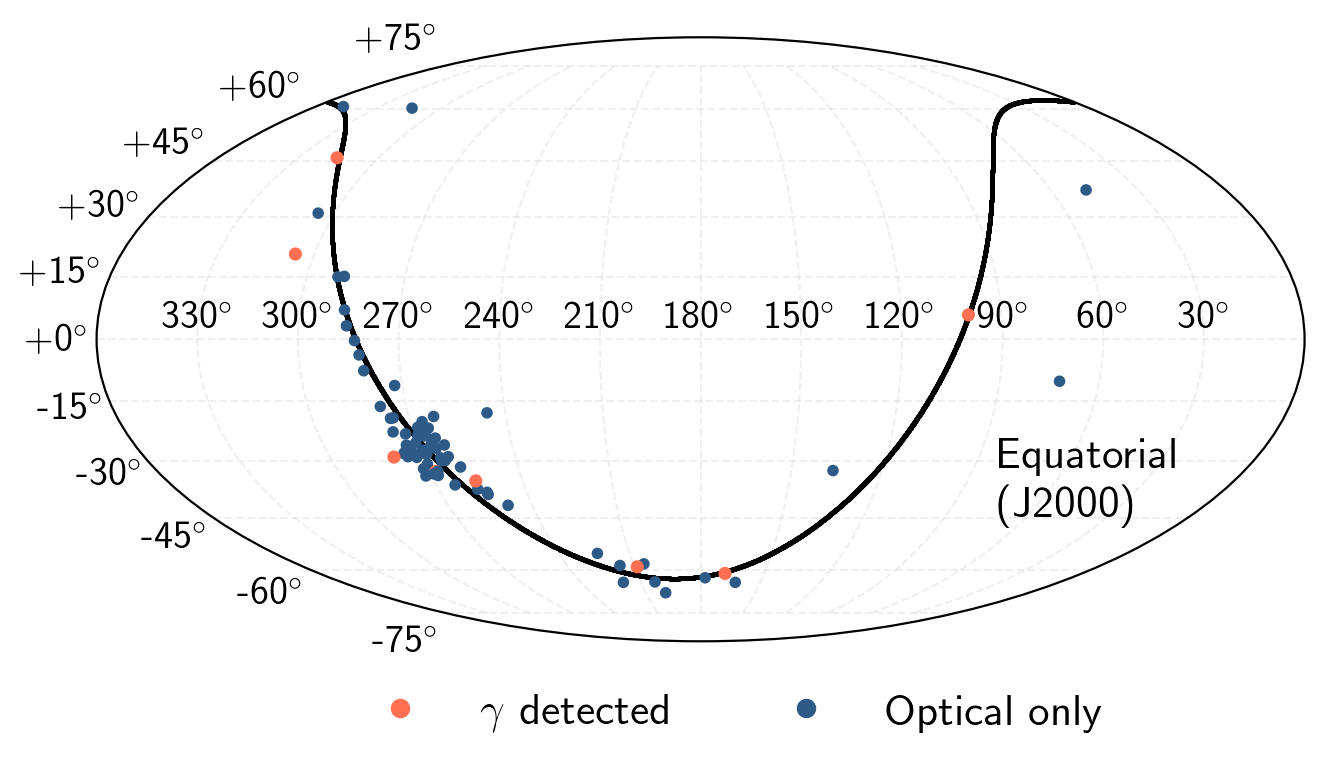

In [6]:
fig = plt.figure(figsize=(8,4), dpi=200, facecolor='w')

gplane = SkyCoord('galactic', b = np.zeros(5000)*u.degree, l = np.linspace(0.0, 360., 5000)*u.degree)
gplane_icrs = gplane.icrs
gcent = SkyCoord('galactic', b = [0.0]*u.degree, l = [0.0]*u.degree)
gcent_icrs = gcent.icrs
cols = [sns.xkcd_rgb['orange pink'] if k is True else sns.xkcd_rgb['light navy blue'] for k in df['gamma']]
s = [14 if k is True else 10 for k in df['gamma']]

legend_els = [ Line2D([0], [0], marker='o', ls = '', color=sns.xkcd_rgb['orange pink'], label=r'$\gamma$ detected'),
              Line2D([0], [0], marker='o', ls = '', color=sns.xkcd_rgb['light navy blue'], label='Optical only')]

ax = fig.add_subplot(111, projection='mollweide')
ax.grid(True, alpha = 0.35, zorder=1, ls = '--')
ax.scatter(-1*equatorial.ra.wrap_at('360d').radian + np.pi, equatorial.dec.radian, zorder=20, s = s, c = cols)
ax.scatter(-1.*gplane_icrs.ra.wrap_at('360d').radian + np.pi, gplane_icrs.dec.radian, zorder=10, c = 'k', s = 0.5)
ax.set_xticklabels(["{:.0f}".format(v) + r'$^{\circ}$' for v in np.linspace(330., 30., 11)], fontsize = 14)
ax.set_yticklabels(["{:+.0f}".format(v) + r'$^{\circ}$' for v in np.linspace(-75., 75., 11)], fontsize = 14)
plt.text(110.*np.pi / 180., -45 * np.pi / 180, 'Equatorial\n(J2000)')
ax.legend(loc=(0.2, -0.18), handles=legend_els, ncol = 2, frameon=False)
plt.savefig('/home/apizzuto/public_html/novae/skymap_all_novae.png', dpi=200, bbox_inches='tight')
plt.show()

In [12]:
print df.columns

Index([u'Name', u'$l$', u'$b$', u'Peak Time', u'$\Delta T$', u'Peak', u'$t_2$',
       u'TS$_{max}$', u'Flux', u'Reference', u'ra', u'dec', u'gamma'],
      dtype='object')


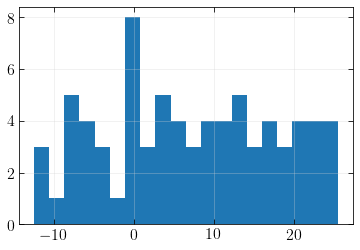

In [17]:
plt.hist(df[u'$\Delta T$'], bins = 20)
plt.show()

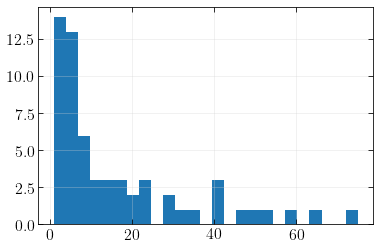

In [51]:
plt.hist(df[u'$t_2$'][~np.isnan(df['$t_2$'])], bins = 25)
plt.show()

In [3]:
from skylab.llh_models import EnergyLLH

In [4]:
?EnergyLLH()